In [1]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import Model
from tensorflow.keras.activations import sigmoid
from tensorflow.keras.activations import relu
import matplotlib.pyplot as plt
import math
from sklearn.cluster import KMeans
from keras import backend as K
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import make_blobs
import numpy as np
import random 
from pandas import  read_csv
from scipy.stats import ks_2samp
from scipy.spatial import distance_matrix

#import statistics 

#tf.enable_eager_execution()


500 4050 450 1350 5000
(5000, 4)
(5000, 1)
N= 4
0 XX 0.041579004
xushape (4, 20)
sum tf.Tensor(1894.0751, shape=(), dtype=float32)
mod: 6 [0.31127575 0.07234833 0.48430127 0.71214855] ==> 15 [0.12016674 0.91761565 0.79168355 0.6254701 ]
new: 6 [0.12645409 0.923903   0.7979709  0.63175744] learnin_rate 0.006


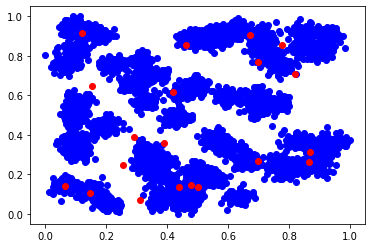

10 XX 0.03674965
xushape (4, 20)
sum tf.Tensor(18064.848, shape=(), dtype=float32)
mod: 3 [0.25385815 0.24865547 0.7455488  0.83078486] ==> 11 [0.15392211 0.6482284  0.4373321  0.6466163 ]
new: 3 [0.16271643 0.6570227  0.44612643 0.6554106 ] learnin_rate 0.006


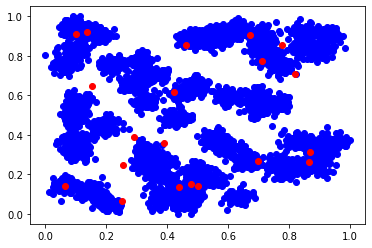

20 XX 0.03467542
xushape (4, 20)
sum tf.Tensor(17613.494, shape=(), dtype=float32)
mod: 5 [0.4396768  0.13592821 0.31515986 0.06791257] ==> 7 [0.25206605 0.14211342 0.6307042  0.74730474]
new: 5 [0.26783243 0.1578798  0.6464706  0.7630711 ] learnin_rate 0.006


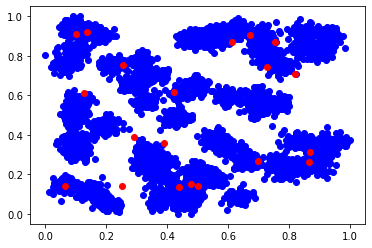

30 XX 0.034208536
xushape (4, 20)
sum tf.Tensor(17505.016, shape=(), dtype=float32)
mod: 5 [0.2540993  0.24749394 0.7451641  0.8293468 ] ==> 9 [0.42231414 0.61491764 0.6855988  0.5137263 ]
new: 5 [0.4308665  0.62347    0.69415116 0.52227867] learnin_rate 0.006


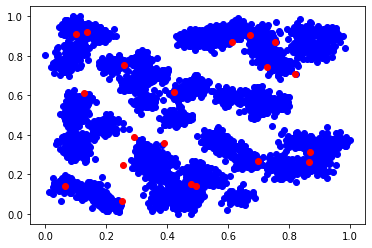

40 XX 0.03438695
xushape (4, 20)
sum tf.Tensor(17590.596, shape=(), dtype=float32)
mod: 5 [0.44563803 0.6681066  0.9027091  0.5869936 ] ==> 7 [0.2520611  0.14214407 0.6307118  0.7473006 ]
new: 5 [0.26224375 0.15232672 0.6408945  0.7574833 ] learnin_rate 0.006


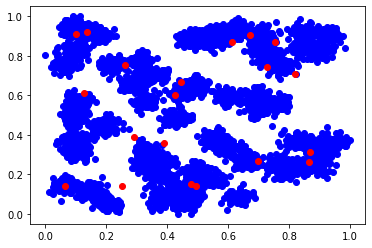

50 XX 0.03411157
xushape (4, 20)
sum tf.Tensor(17484.834, shape=(), dtype=float32)
mod: 5 [0.252363   0.24965443 0.7481841  0.83575916] ==> 9 [0.42435563 0.6170991  0.6874805  0.5124526 ]
new: 5 [0.43346402 0.6262075  0.6965889  0.52156097] learnin_rate 0.0048


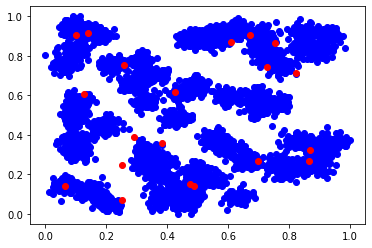

60 XX 0.034286905
xushape (4, 20)
sum tf.Tensor(17567.355, shape=(), dtype=float32)
mod: 5 [0.4522965  0.6654974  0.90034175 0.58413196] ==> 7 [0.25216287 0.14432532 0.6315479  0.74656796]
new: 5 [0.2621847  0.15434717 0.6415698  0.75658983] learnin_rate 0.0048


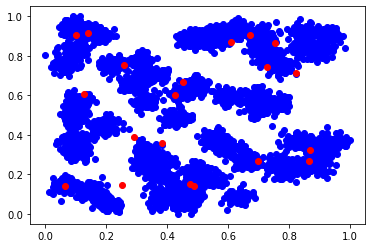

70 XX 0.034023922
xushape (4, 20)
sum tf.Tensor(17466.344, shape=(), dtype=float32)
mod: 5 [0.2499295  0.24907155 0.74814606 0.8389189 ] ==> 9 [0.42698807 0.61892956 0.6900079  0.5129287 ]
new: 5 [0.4361273  0.6280688  0.69914716 0.52206796] learnin_rate 0.0038400001


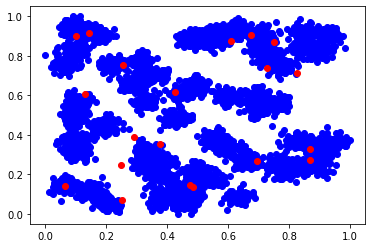

80 XX 0.034202904
xushape (4, 20)
sum tf.Tensor(17548.438, shape=(), dtype=float32)
mod: 5 [0.45752275 0.6630024  0.89804506 0.5812608 ] ==> 7 [0.25265673 0.14589393 0.63238776 0.7457662 ]
new: 5 [0.26251084 0.15574805 0.6422419  0.75562036] learnin_rate 0.0038400001


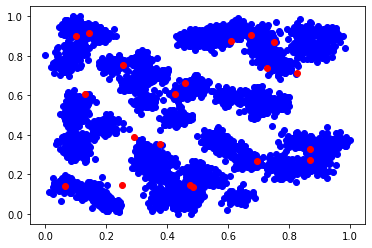

90 XX 0.0339322
xushape (4, 20)
sum tf.Tensor(17449.701, shape=(), dtype=float32)
mod: 5 [0.24756357 0.24814342 0.74720275 0.8405705 ] ==> 9 [0.42954817 0.62021244 0.692663   0.51465887]
new: 5 [0.4385978  0.62926203 0.7017126  0.52370846] learnin_rate 0.003072


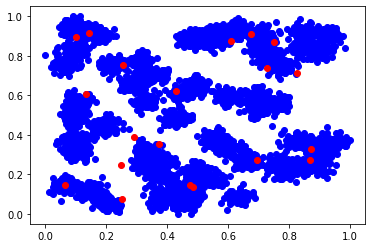

100 XX 0.03411465
xushape (4, 20)
sum tf.Tensor(17531.332, shape=(), dtype=float32)
mod: 5 [0.4618256  0.66048175 0.89528537 0.5781426 ] ==> 7 [0.2526143  0.14710598 0.63303965 0.74563056]
new: 5 [0.26221153 0.15670322 0.6426369  0.7552278 ] learnin_rate 0.003072


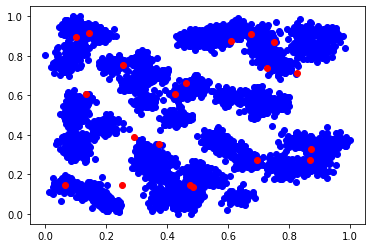

In [13]:
# hybrid model DLS my proposal
# P 05

EPOCHS = 100+1
es = 10

#H = M * 5
HS = 20
B = 32
A = 0.1
KI = 1

( x_train,y_train) = read_data_array_cv2("Out_clusters.csv")

print (np.array(x_train).shape)
print (np.array(y_train).shape)


class OutLayer(tf.keras.layers.Layer):
    def __init__(self, num_outputs = 1):
        super(OutLayer, self).__init__()
        self.num_outputs = num_outputs
        self.mode = 2


    def build (self, input_shape):
        self.num_inputs = input_shape[-1]
        self.freqlist = [0 for _ in range(self.num_inputs)]
        
    def call(self, input):
        #print ("call", input.shape)
        #print (input)
        if self.mode  == 1:
            result = tf.math.reduce_sum(input,axis=[1])
        else:
            result = tf.math.reduce_min(input,axis=[1])
            wn = tf.math.argmin(input, axis=1).numpy()
            for i in range(input.shape[0]):
                # self.freqlist[wn[i]] += 1     # count_winner
                self.freqlist[wn[i]] += input[i,wn[i]]  # sum_dist
        return result
    
        
class LSLayer(tf.keras.layers.Layer):
    
    def __init__(self,  num_outputs_s, indata,  Ara = 1.0, activation=sigmoid, km_init = 1, wstd = 0.3, bstd = 0.5):
        super(LSLayer, self).__init__()
        self.num_outputs_s = num_outputs_s 
        self.num_outputs = num_outputs_s 
        self.activation = activation
        self.traindata = indata
        self.Ara = Ara
        self.km_init = km_init
        self.wstd = wstd
        self.bstd = bstd
        
    def build(self, input_shape):  
        self.num_inputs = input_shape[-1]
        self.kernel = self.add_weight("kernel",
                                      shape=(int(input_shape[-1]),
                                             self.num_outputs), 
                                      initializer=tf.keras.initializers.RandomNormal(stddev=self.wstd),
                                     trainable=True)
            
        #print ( "set_circles ---------------------------")
        
        M = self.num_outputs_s
        
        if M == 0:
            return
        
        if self.km_init == 0:
            x_train =  self.traindata[0]
            y_train =  self.traindata[1]
            N = x_train.shape[0]   
            D = x_train.shape[1]   
            C = M
            #print ("C",C,"M",M)

            xu = self.get_weights()
            ilist = random.sample(range(N),M)
            print (ilist)
            print ("V", self.traindata[0].shape)

            for m in range(M):
                for c in range(D):
                    xu[0][c,m] = self.traindata[0][ilist[m],c]

            self.set_weights(xu )
        if self.km_init == 1:
            x_train =  self.traindata[0]
            y_train =  self.traindata[1]
            N = x_train.shape[0]   
            D = x_train.shape[1]   
            C = M
            #print ("C",C,"M",M)

            cls = KMeans(n_clusters=C, init="random",  n_init=1).fit(x_train)
            #cls = KMeans(n_clusters=C,   n_init=1).fit(x_train)

            centers = cls.cluster_centers_

            xu = self.get_weights()

            for m in range(M):
                for c in range(D):
                    xu[0][c,m] = centers[m][c]

            self.set_weights(xu )
        if self.km_init == 2:
            N = self.traindata[0].shape[0]
            
            ilist = random.sample(range(N),4*M)
            D = self.traindata[0].shape[1]   
            x_train = np.zeros((4*M, D))           
            C = M
            
            for m in range(4*M):
                for c in range(D):
                    x_train[m,c] = self.traindata[0][ilist[m],c]
            
            cls = KMeans(n_clusters=C,init="random",  n_init=1).fit(x_train)

            centers = cls.cluster_centers_

            xu = self.get_weights()

            for m in range(M):
                for c in range(D):
                    xu[0][c,m] = centers[m][c]

            self.set_weights(xu )
        
        #print ("end ==============================")
        
    
    # F2 method LS layer
    def call(self, input):
        
        #print ("CALL :", input.numpy())
        isp = input.shape
        In1 = tf.transpose(input)
        kernel_S = self.kernel
        
        # case spherical
        
        s_shape  = self.num_outputs_s 
        In2 = tf.stack([In1] * s_shape)
        InD = tf.transpose(In2)
        WD = tf.stack([kernel_S] * isp[0])
        ddd = WD - InD
        dd0 = tf.math.multiply(ddd, ddd)
        dd1 = tf.math.reduce_sum(dd0, axis =1)
        dd2 = tf.cast(dd1,tf.double)
        dd3 = tf.sqrt(dd2)
        d_r = tf.cast(dd3,tf.float32)
        result_S = relu(d_r)
                                
        return result_S
    
    
    def rearrange(self,freqlist,optimizer,red):
        
        xu = self.get_weights()
        xut = xu[0].transpose()
        dm = distance_matrix(xut,xut)
        N = xut.shape[0]
        D = xut.shape[1]
        dmin = dm[0,1]
        iw = 0
        jw = 1
        for i in range(N):
            for j in range(N):
                if i == j:
                    continue
                if dm[i,j] < dmin:
                    dmin = dm[i,j]
                    iw = i
                    jw = j
        #print (iw,jw,xut[iw],xut[jw])   
        w2 = freqlist.index(max(freqlist))
        if type(w2) == list:
            w2 = w2[0]
        print ("sum",sum(freqlist))
        print ("mod:",iw,xut[iw],"==>",w2,xut[w2])
        
        m = iw
        for c in range(D):
            xu[0][c,m] = xu[0][c,w2]+ dmin**D

        self.set_weights(xu )
        print ("new:",iw,xut[iw], "learnin_rate", optimizer.learning_rate.numpy())
        optimizer.learning_rate = optimizer.learning_rate.numpy()*red
        

class NN_Model(Model):
    
    def __init__(self, hs, indata,kinit):
        super(NN_Model, self).__init__()
        self.d1 = LSLayer(hs, indata,km_init = kinit)
        self.d2 = OutLayer()
        
    def call(self, x):
        x = self.d1(x)
        #print ("call benn:",x, tf.math.reduce_sum(x))
        return self.d2(x)
        
        


#@tf.function
def train_step(datas, labels,modelk,loss_objectk,optimizerk,train_lossk,train_accuracyk):
    with tf.GradientTape() as tape:
        # training=True is only needed if there are layers with different
        # behavior during training versus inference (e.g. Dropout).
        predictions = modelk(datas, training=True)
        loss = loss_objectk(labels, predictions)
    gradients = tape.gradient(loss, modelk.trainable_variables)
    optimizerk.apply_gradients(zip(gradients, modelk.trainable_variables))

    train_lossk(loss)
    train_accuracyk(labels, predictions)

#@tf.function
def test_step(datas, labels,modelk,loss_objectk,test_lossk,test_accuracyk):
    # training=False is only needed if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    
    predictions = modelk(datas, training=False)
    t_loss = loss_objectk(labels, predictions)

    test_lossk(t_loss)
    test_accuracyk(labels, predictions)
        

    

# (x_train,y_train,x_test,y_test) = gen_data_array_cv(K)


#K = 10

M = x_train.shape[1]
C = y_train.shape[1]

test_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(B)

gbest_v = 0
gbest_t = 0

ValA = []
TestA = []
ValAS = [0 for x in range(0,EPOCHS,es)]
TestAS = [0 for x in range(0,EPOCHS,es)]
X = [x for x in range(0,EPOCHS,es)]

print ("N=", x_train[0].shape[0])

#tf.logging.set_verbosity(tf.logging.ERROR)
K = 0
for k in range(1):
    
    best_v = 0
    best_t = 0
    
    # Create an instance of the model
    model =  NN_Model(HS,(x_train, y_train),  kinit=KI)

    loss_object = tf.keras.losses.MeanSquaredError()

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.006)
    #optimizer = tf.keras.optimizers.RMSprop()
    train_loss = tf.keras.metrics.Mean(name='train_loss')
    train_accuracy = tf.keras.metrics.MeanSquaredError(name='train_accuracy')

    test_loss =  tf.keras.metrics.Mean(name='test_loss')
    test_accuracy = tf.keras.metrics.MeanSquaredError(name='test_accuracy')
    
    val_loss = tf.keras.metrics.Mean(name='val_loss')
    val_accuracy = tf.keras.metrics.MeanSquaredError(name='val_accuracy')
    
    train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(B)
    val_ds =  tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(B)
 
    e = 0
    testprev = 10000

    for epoch in range(EPOCHS):
      # Reset the metrics at the start of the next epoch

        train_loss.reset_states()
        train_accuracy.reset_states()
        test_loss.reset_states()
        test_accuracy.reset_states()
        

        for datas, labels in train_ds:
            #print ('A',datas.shape,labels.shape)
            train_step(datas, labels,model,loss_object,optimizer,train_loss,train_accuracy)


        for test_datas, test_labels in test_ds:
            #tpredictions = model[k](test_datas, training=False)
            test_step(test_datas, test_labels,model,loss_object,test_loss,test_accuracy)

        if K > 1:
            for val_datas, val_labels in val_ds:
                #vpredictions = model[k](val_datas, training=False)
                test_step(val_datas, val_labels,model,loss_object,val_loss,val_accuracy)
            
            
        if epoch % es == 0:
            acc = test_accuracy.result().numpy()
            print(epoch, "XX", acc)
            N = x_train.shape[0]
            Xx = [x_train[i,0] for i in range(N)]
            Xy = [x_train[i,1] for i in range(N)]
            plt.scatter(Xx,Xy,c="blue")
            xu = model.d1.get_weights()[0]
            print ("xushape",xu.shape)
            Cx = [xu[0,i] for i in range(xu.shape[1])]
            Cy = [xu[1,i] for i in range(xu.shape[1])]
            plt.scatter(Cx,Cy,c="red")
            red = 1
            if testprev < acc:
                red = 0.8
            model.d1.rearrange(model.d2.freqlist,optimizer,red)
            model.d2.freqlist = [0 for _ in range(xu.shape[1])]
            testprev = acc

            plt.show()
        #if epoch == 1:
        #    model.d2.mode = 2
        #    optimizer.learning_rate = 0.03

            

    #plt.plot(X, Y,label="Accuracy curve")



In [14]:
x1 = [372,344,432,327,380,415]
x2 = [308,308,311,314,314,340]
print (sum(x1)/len(x1),":", sum(x2)/len(x2))


378.3333333333333 : 315.8333333333333


In [2]:
def read_data_array_cv2(fnev):
    fin = open(fnev,"r")
    sor = fin.read().split("\n")
    sors = sor[0].split(",")
    M = int(sors[0])
    C = 1
    K = int(sors[2])
    Nte = 0
    Ntrt = 0
    Ntrv = 0
    Ntrv2 = 0
    i = 0
    while (sor[i+2][0:3] != "Tra"):
        i += 1
    Nte = i
    i = 0
    while (sor[i+3+Nte][0:3] != "Val"):
        i += 1
    Ntrt = i
    i = 0
    while (sor[i+4+Nte+Ntrt][0:3] != "Val"):
        i += 1
    Ntrv2 = i
    i = 0
    while (sor[i+5+Nte+Ntrt+Ntrv2][0:3] != "Tra"):
        i += 1
    Ntrv = i
    
    N = Nte + Ntrt + Ntrv

    print (Nte, Ntrt, Ntrv, Ntrv2,N)
    x2_train = np.zeros((N,M),dtype='float32')
    y2_train = np.zeros((N,C))
    
    ti = 0
    for i in range(2,2+Nte):
        sors = sor[i].split(",")
        for j in  range(M):
            x2_train[ti,j] = float(sors[j])
        ti += 1
    k = 0            
    base = 2+Nte  +1
    for i in range( base, base + Ntrt ):
        sors = sor[i].split(",")
        for j in  range(M):
            x2_train[ti,j] = float(sors[j])
        ti += 1

    base = base + (Ntrt + 1)
    for i in range(base, base + Ntrv2 ):
        sors = sor[i].split(",")

    base = base + (Ntrv2 + 1)
    for i in range(base, base + Ntrv ):
        sors = sor[i].split(",")
        for j in  range(M):
            x2_train[ti,j] = float(sors[j])
        ti += 1
        

    fin.close()
    
    return (x2_train,y2_train)    

In [17]:
from scipy.spatial import distance_matrix
D = np.array([[1,3],[3,4],[1,5]])
print (D)
print (D.transpose())
dm = distance_matrix(D,D)
print (dm)
dm = distance_matrix(D.transpose(),D.transpose())
print (dm)


[[1 3]
 [3 4]
 [1 5]]
[[1 3 1]
 [3 4 5]]
[[0.         2.23606798 2.        ]
 [2.23606798 0.         2.23606798]
 [2.         2.23606798 0.        ]]
[[0.         4.58257569]
 [4.58257569 0.        ]]


In [22]:
def proba (l):
    l[1] = 0

x = [1,3,4]
print (x)
proba(x)
print(x)

[1, 3, 4]
[1, 0, 4]
